# Objective

* Identify the Which Platform have more impact on Sales 

* To build the Model which will help to Predict the future sales based on Money invest in Different Platform 

In [1]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


# Data Import

In [2]:
df = pd.read_csv(r"C:\Users\Akshay\Downloads\df_finalMLR.csv")
df

,Data PC1,Data PC2,Data PC3,Data PC4,Data PC5,Status,Life expectancy
0,5.371610,0.743836,2.998958,0.237777,-0.510412,0.460348,-0.445672
1,4.965979,0.421790,0.790446,1.160532,0.044961,0.460348,-0.982602
2,4.993136,0.310608,2.576559,0.233631,-0.346038,0.460348,-0.982602
3,4.960212,0.056763,1.563015,0.814386,0.325235,0.460348,-1.024714
4,5.065702,-0.162623,1.483289,0.755846,0.209046,0.460348,-1.056298
...,...,...,...,...,...,...,...
2923,3.923369,0.813591,-0.975157,0.142500,1.476260,0.460348,-2.624974
2924,4.799623,1.716053,-0.206273,0.421670,0.941105,0.460348,-2.603918
2925,1.828564,1.402656,-1.471037,-1.146179,0.147969,0.460348,-2.572334
2926,2.827682,1.087002,-0.844753,-1.438488,1.165557,0.460348,-2.519694


In [21]:
df.columns

Index(['Data PC1', 'Data PC2', 'Data PC3', 'Data PC4', 'Data PC5', 'Status',
       'Life expectancy '],
      dtype='object')

In [22]:
df=df.rename(columns={'Life expectancy ':'Life_expectancy'})

In [23]:
# Putting feature variable to X
X = df.drop('Life_expectancy', axis= 1)

# Putting response variable to y
y = df[['Life_expectancy']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [24]:
df_f = pd.concat([y_train, X_train], axis=1)
df_f.head()

,Life_expectancy,Data PC1,Data PC2,Data PC3,Data PC4,Data PC5,Status
2131,0.038617,-1.863914,0.580560,1.936188,-0.695173,1.230475,0.460348
1581,-2.635502,3.755300,0.630651,-0.377662,0.023922,-0.185434,0.460348
2528,-0.498312,1.724196,2.358652,-0.940896,0.491071,-1.605473,0.460348
985,0.491322,-1.240389,0.075383,-0.928810,-0.752553,-0.023132,0.460348
956,-1.003658,1.322908,1.377440,-1.603669,2.210433,-0.829370,0.460348


### Multicolinearity (with the help of VIF)

In [25]:
X1=df_f.drop(['Life_expectancy'],axis=1)
VIF = pd.Series([variance_inflation_factor(X1.values, i) # i = 0
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
VIF

Data PC1    1.464544
Data PC2    1.108309
Data PC3    1.019857
Data PC4    1.002861
Data PC5    1.051122
Status      1.635562
dtype: float64

* No collinearity in the data, indicate no multi colinearity 

# Model Building

In [26]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
Model3= lreg.fit(X_train,y_train)

In [27]:
np.round(Model3.intercept_,4)

array([0.0039])

In [28]:
np.round(Model3.coef_,4)

array([[-0.2961, -0.0432,  0.1315,  0.0006, -0.2331, -0.1004]])

In [29]:
np.round(Model3.score(X_train,y_train),3)

0.814

In [30]:
Y = 0.0039 + (-0.2961* -1.863914) + (-0.0432*0.580560)+(0.1315*1.936188)+(0.0006*-0.695173)+(-0.2331*1.230475)+(-0.1004*0.460348)
Y

0.4518736998999999

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

In [31]:
df_f.head()

,Life_expectancy,Data PC1,Data PC2,Data PC3,Data PC4,Data PC5,Status
2131,0.038617,-1.863914,0.580560,1.936188,-0.695173,1.230475,0.460348
1581,-2.635502,3.755300,0.630651,-0.377662,0.023922,-0.185434,0.460348
2528,-0.498312,1.724196,2.358652,-0.940896,0.491071,-1.605473,0.460348
985,0.491322,-1.240389,0.075383,-0.928810,-0.752553,-0.023132,0.460348
956,-1.003658,1.322908,1.377440,-1.603669,2.210433,-0.829370,0.460348


In [32]:
df_f['fitted_value']= np.round(Model3.predict(X_train),1) #Predicted Value
df_f['residual'] = np.round(df_f.Life_expectancy-df_f.fitted_value,1)  #Error
df_f.head()

,Life_expectancy,Data PC1,Data PC2,Data PC3,Data PC4,Data PC5,Status,fitted_value,residual
2131,0.038617,-1.863914,0.580560,1.936188,-0.695173,1.230475,0.460348,0.5,-0.5
1581,-2.635502,3.755300,0.630651,-0.377662,0.023922,-0.185434,0.460348,-1.2,-1.4
2528,-0.498312,1.724196,2.358652,-0.940896,0.491071,-1.605473,0.460348,-0.4,-0.1
985,0.491322,-1.240389,0.075383,-0.928810,-0.752553,-0.023132,0.460348,0.2,0.3
956,-1.003658,1.322908,1.377440,-1.603669,2.210433,-0.829370,0.460348,-0.5,-0.5


# Linearity

<Axes: title={'center': 'sales vs TV'}, xlabel='Data PC1', ylabel='Life_expectancy'>

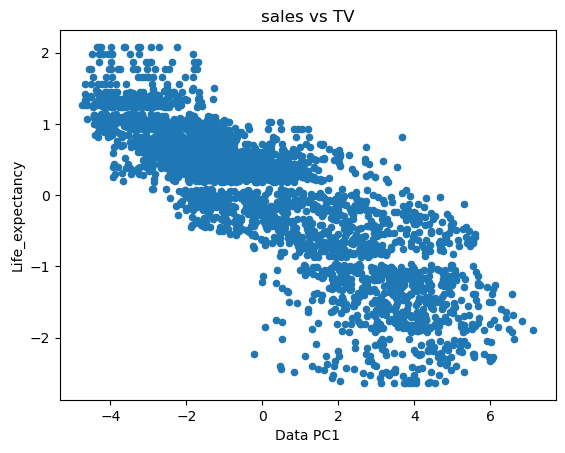

In [34]:
df.plot.scatter(x='Data PC1', y='Life_expectancy', title='sales vs TV')

# Homoscedasicity

<Axes: xlabel='fitted_value', ylabel='residual'>

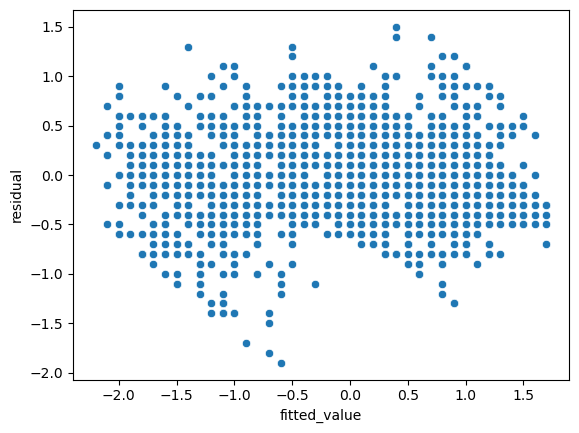

In [36]:
sns.scatterplot(x='fitted_value', y='residual',data=df_f)

# Normality

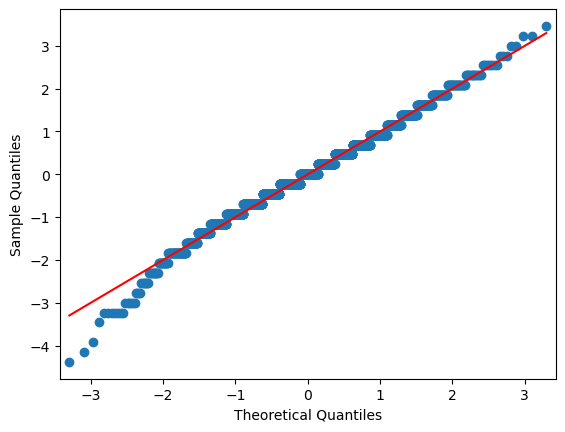

In [37]:
import statsmodels.api as sm
fig = sm.qqplot(df_f['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# Model Error are IID 

<Axes: ylabel='Frequency'>

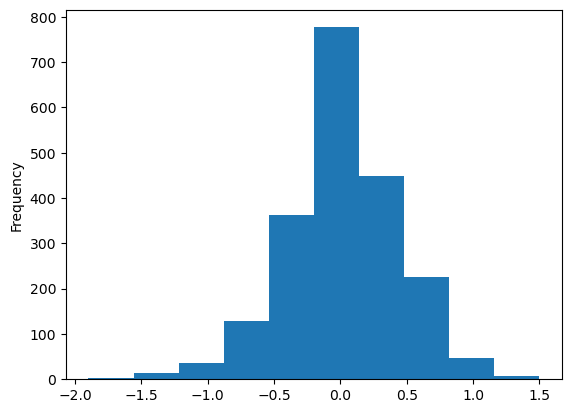

In [38]:
df_f['residual'].plot.hist()

# Prediction on Test Data (unseen data)

In [39]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,Data PC1,Data PC2,Data PC3,Data PC4,Data PC5,Status,Life_expectancy
2374,3.494998,1.662141,0.596372,0.103409,-0.038069,0.460348,-1.793260
158,0.638404,-0.013083,-0.903173,-0.452722,-1.585366,0.460348,-0.182471
893,6.596508,0.608736,0.344734,0.413341,0.736525,0.460348,-1.687979
968,1.466319,-1.998776,-0.691399,0.574747,1.510291,0.460348,-1.129994
275,3.925949,1.781401,-1.461938,0.810700,-0.954304,0.460348,-1.045770


In [40]:
df_test['Prediction']= np.round(Model3.predict(X_test),1) # predict = all row prediction ( Auto )
df_test.head()  # np.round(Model3.predict(X_train),1)

,Data PC1,Data PC2,Data PC3,Data PC4,Data PC5,Status,Life_expectancy,Prediction
2374,3.494998,1.662141,0.596372,0.103409,-0.038069,0.460348,-1.793260,-1.1
158,0.638404,-0.013083,-0.903173,-0.452722,-1.585366,0.460348,-0.182471,0.0
893,6.596508,0.608736,0.344734,0.413341,0.736525,0.460348,-1.687979,-2.1
968,1.466319,-1.998776,-0.691399,0.574747,1.510291,0.460348,-1.129994,-0.8
275,3.925949,1.781401,-1.461938,0.810700,-0.954304,0.460348,-1.045770,-1.3


# Train

In [41]:
from sklearn.metrics import r2_score
r2 = r2_score(df_f.Life_expectancy, df_f.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.81


# Test

In [42]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.Life_expectancy, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.8


* Model is good fit on Train dataset  & Performance of model on Test data is also good fit 

# Loss / Cost / Error Function - RMSE

In [44]:
import math
from sklearn.metrics import mean_squared_error
model_mse = mean_squared_error(df_f['Life_expectancy'], df_f['fitted_value'])
model_rmse = math.sqrt(model_mse)
print("Train RMSE {:.3}".format(model_rmse))

#import math
#from sklearn.metrics import mean_squared_error
#model_mse = mean_squared_error(df['sales'], df['fitted_value'])
#model_rmse = math.sqrt(model_mse)
#print("Train RMSE {:.3}".format(model_rmse))

Train RMSE 0.431


In [45]:
import math
from sklearn.metrics import mean_squared_error
# calculate the mean squared error
model_mse = mean_squared_error(df_test['Life_expectancy'], df_test['Prediction'])
model_rmse = math.sqrt(model_mse)
print("Test RMSE {:.3}".format(model_rmse))

Test RMSE 0.448


In [ ]:
import pickle
pickle.dump(lreg, open(r"C:\Users\Akshay\Desktop\Cloud\advtModel.pkl",'wb'))

# Finish